# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Mostrar las primeras filas del conjunto de datos
print(fraud.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

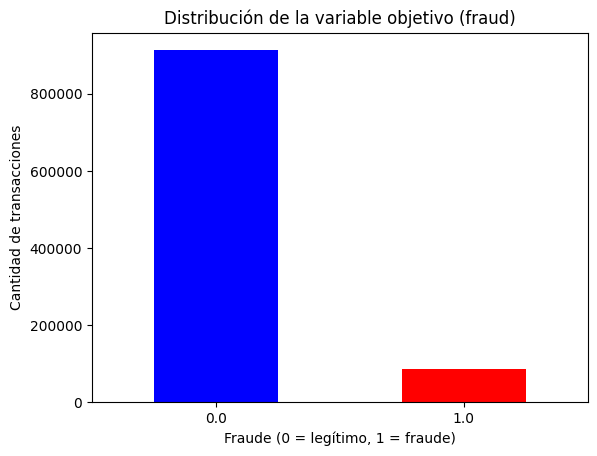

In [4]:
# 1

# Comprobar la distribución de la variable objetivo
fraud['fraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de la variable objetivo (fraud)')
plt.xlabel('Fraude (0 = legítimo, 1 = fraude)')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=0)
plt.show()

In [5]:
# 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir los datos en características y variable objetivo
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# 3

from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[271936   1843]
 [ 10431  15790]]

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [7]:
# 4

from sklearn.utils import resample

# Combinar el conjunto de entrenamiento en un DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Separar las clases
legit = train_data[train_data['fraud'] == 0]
fraudulent = train_data[train_data['fraud'] == 1]

# Sobrerrepresentar la clase minoritaria
fraudulent_upsampled = resample(fraudulent,
                                 replace=True,     # permite la replicación
                                 n_samples=len(legit),    # para que la clase minoritaria sea igual a la mayoritaria
                                 random_state=42) # para reproducibilidad

# Combinar el conjunto de datos
upsampled = pd.concat([legit, fraudulent_upsampled])

# Dividir en características y variable objetivo
X_upsampled = upsampled.drop('fraud', axis=1)
y_upsampled = upsampled['fraud']

# Entrenar el modelo nuevamente
model_upsampled = LogisticRegression(max_iter=1000)
model_upsampled.fit(X_upsampled, y_upsampled)

# Evaluar el modelo
y_pred_upsampled = model_upsampled.predict(X_test)

print("Matriz de confusión (oversample):")
print(confusion_matrix(y_test, y_pred_upsampled))

print("\nInforme de clasificación (oversample):")
print(classification_report(y_test, y_pred_upsampled))


Matriz de confusión (oversample):
[[255520  18259]
 [  1356  24865]]

Informe de clasificación (oversample):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [8]:
# 5

# Subrepresentar la clase mayoritaria
legit_downsampled = resample(legit,
                              replace=False,    # no permite la replicación
                              n_samples=len(fraudulent),     # para que la clase mayoritaria sea igual a la minoritaria
                              random_state=42) # para reproducibilidad

# Combinar el conjunto de datos
downsampled = pd.concat([legit_downsampled, fraudulent])

# Dividir en características y variable objetivo
X_downsampled = downsampled.drop('fraud', axis=1)
y_downsampled = downsampled['fraud']

# Entrenar el modelo nuevamente
model_downsampled = LogisticRegression(max_iter=1000)
model_downsampled.fit(X_downsampled, y_downsampled)

# Evaluar el modelo
y_pred_downsampled = model_downsampled.predict(X_test)

print("Matriz de confusión (undersample):")
print(confusion_matrix(y_test, y_pred_downsampled))

print("\nInforme de clasificación (undersample):")
print(classification_report(y_test, y_pred_downsampled))


Matriz de confusión (undersample):
[[255529  18250]
 [  1327  24894]]

Informe de clasificación (undersample):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install imbalanced-learn


In [12]:
# 6

from imblearn.over_sampling import SMOTE

# Crear SMOTE
smote = SMOTE(random_state=42)

# Ajustar SMOTE al conjunto de entrenamiento
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Entrenar el modelo nuevamente
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_smote, y_smote)

# Evaluar el modelo
y_pred_smote = model_smote.predict(X_test)

print("Matriz de confusión (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nInforme de clasificación (SMOTE):")
print(classification_report(y_test, y_pred_smote))


Matriz de confusión (SMOTE):
[[255665  18114]
 [  1400  24821]]

Informe de clasificación (SMOTE):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

